# Decision Tree
## Introduction 
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It is a tree-like structure where:

- **Nodes** represent features/attributes.
- **Edges** represent decisions based on attribute values.
- **Leaves** represent the final output class or value.

Decision trees use **if-else conditions** to split the dataset into smaller subsets, eventually leading to predictions. They are easy to interpret and can handle both numerical and categorical data.

## Types of Decision Trees
- Classification Tree – Used when the target variable is categorical (e.g., Spam or Not Spam).
- Regression Tree – Used when the target variable is continuous (e.g., Predicting house prices).

## Key Concepts in Decision Trees
- **Entropy:** A measure of impurity or randomness in data. A pure dataset has entropy = 0.
- **Gini Impurity:** Measures the likelihood of incorrect classification.
- **Information Gain:** The decrease in entropy after splitting a node.
- **Pruning:** Removing unnecessary branches to prevent overfitting.


## Problem Statement
Predict whether an employee will leave the company based on various attributes like salary, work-life balance, job satisfaction, etc.

### Step 1: Data Loading

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Datasets/HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Step 2: Data Preprocessing

In [3]:
df = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)


In [4]:
#convert categorical features to numerical using Label encoding
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

categorical_col = df.select_dtypes(include='object').columns

for col in categorical_col:
    df[col] = label.fit_transform(df[col])


In [5]:
X = df.drop('Attrition',axis= 1)
y = df['Attrition']

In [6]:
from sklearn.model_selection import train_test_split
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Train Decison Tree Model 

In [7]:
from sklearn.tree import DecisionTreeClassifier
# Train decision Tree Model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### Step 4: Evaluate Model Performance

In [8]:
#   Make prediction
y_pred = dt_model.predict(X_test)  

In [9]:
from sklearn.metrics import classification_report
# Accuracy and Classification Report
accuracy = dt_model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Model accuracy: 0.85

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.31      0.10      0.15        39

    accuracy                           0.85       294
   macro avg       0.59      0.53      0.54       294
weighted avg       0.80      0.85      0.82       294



### Step 5: Visualizing the Decision Tree

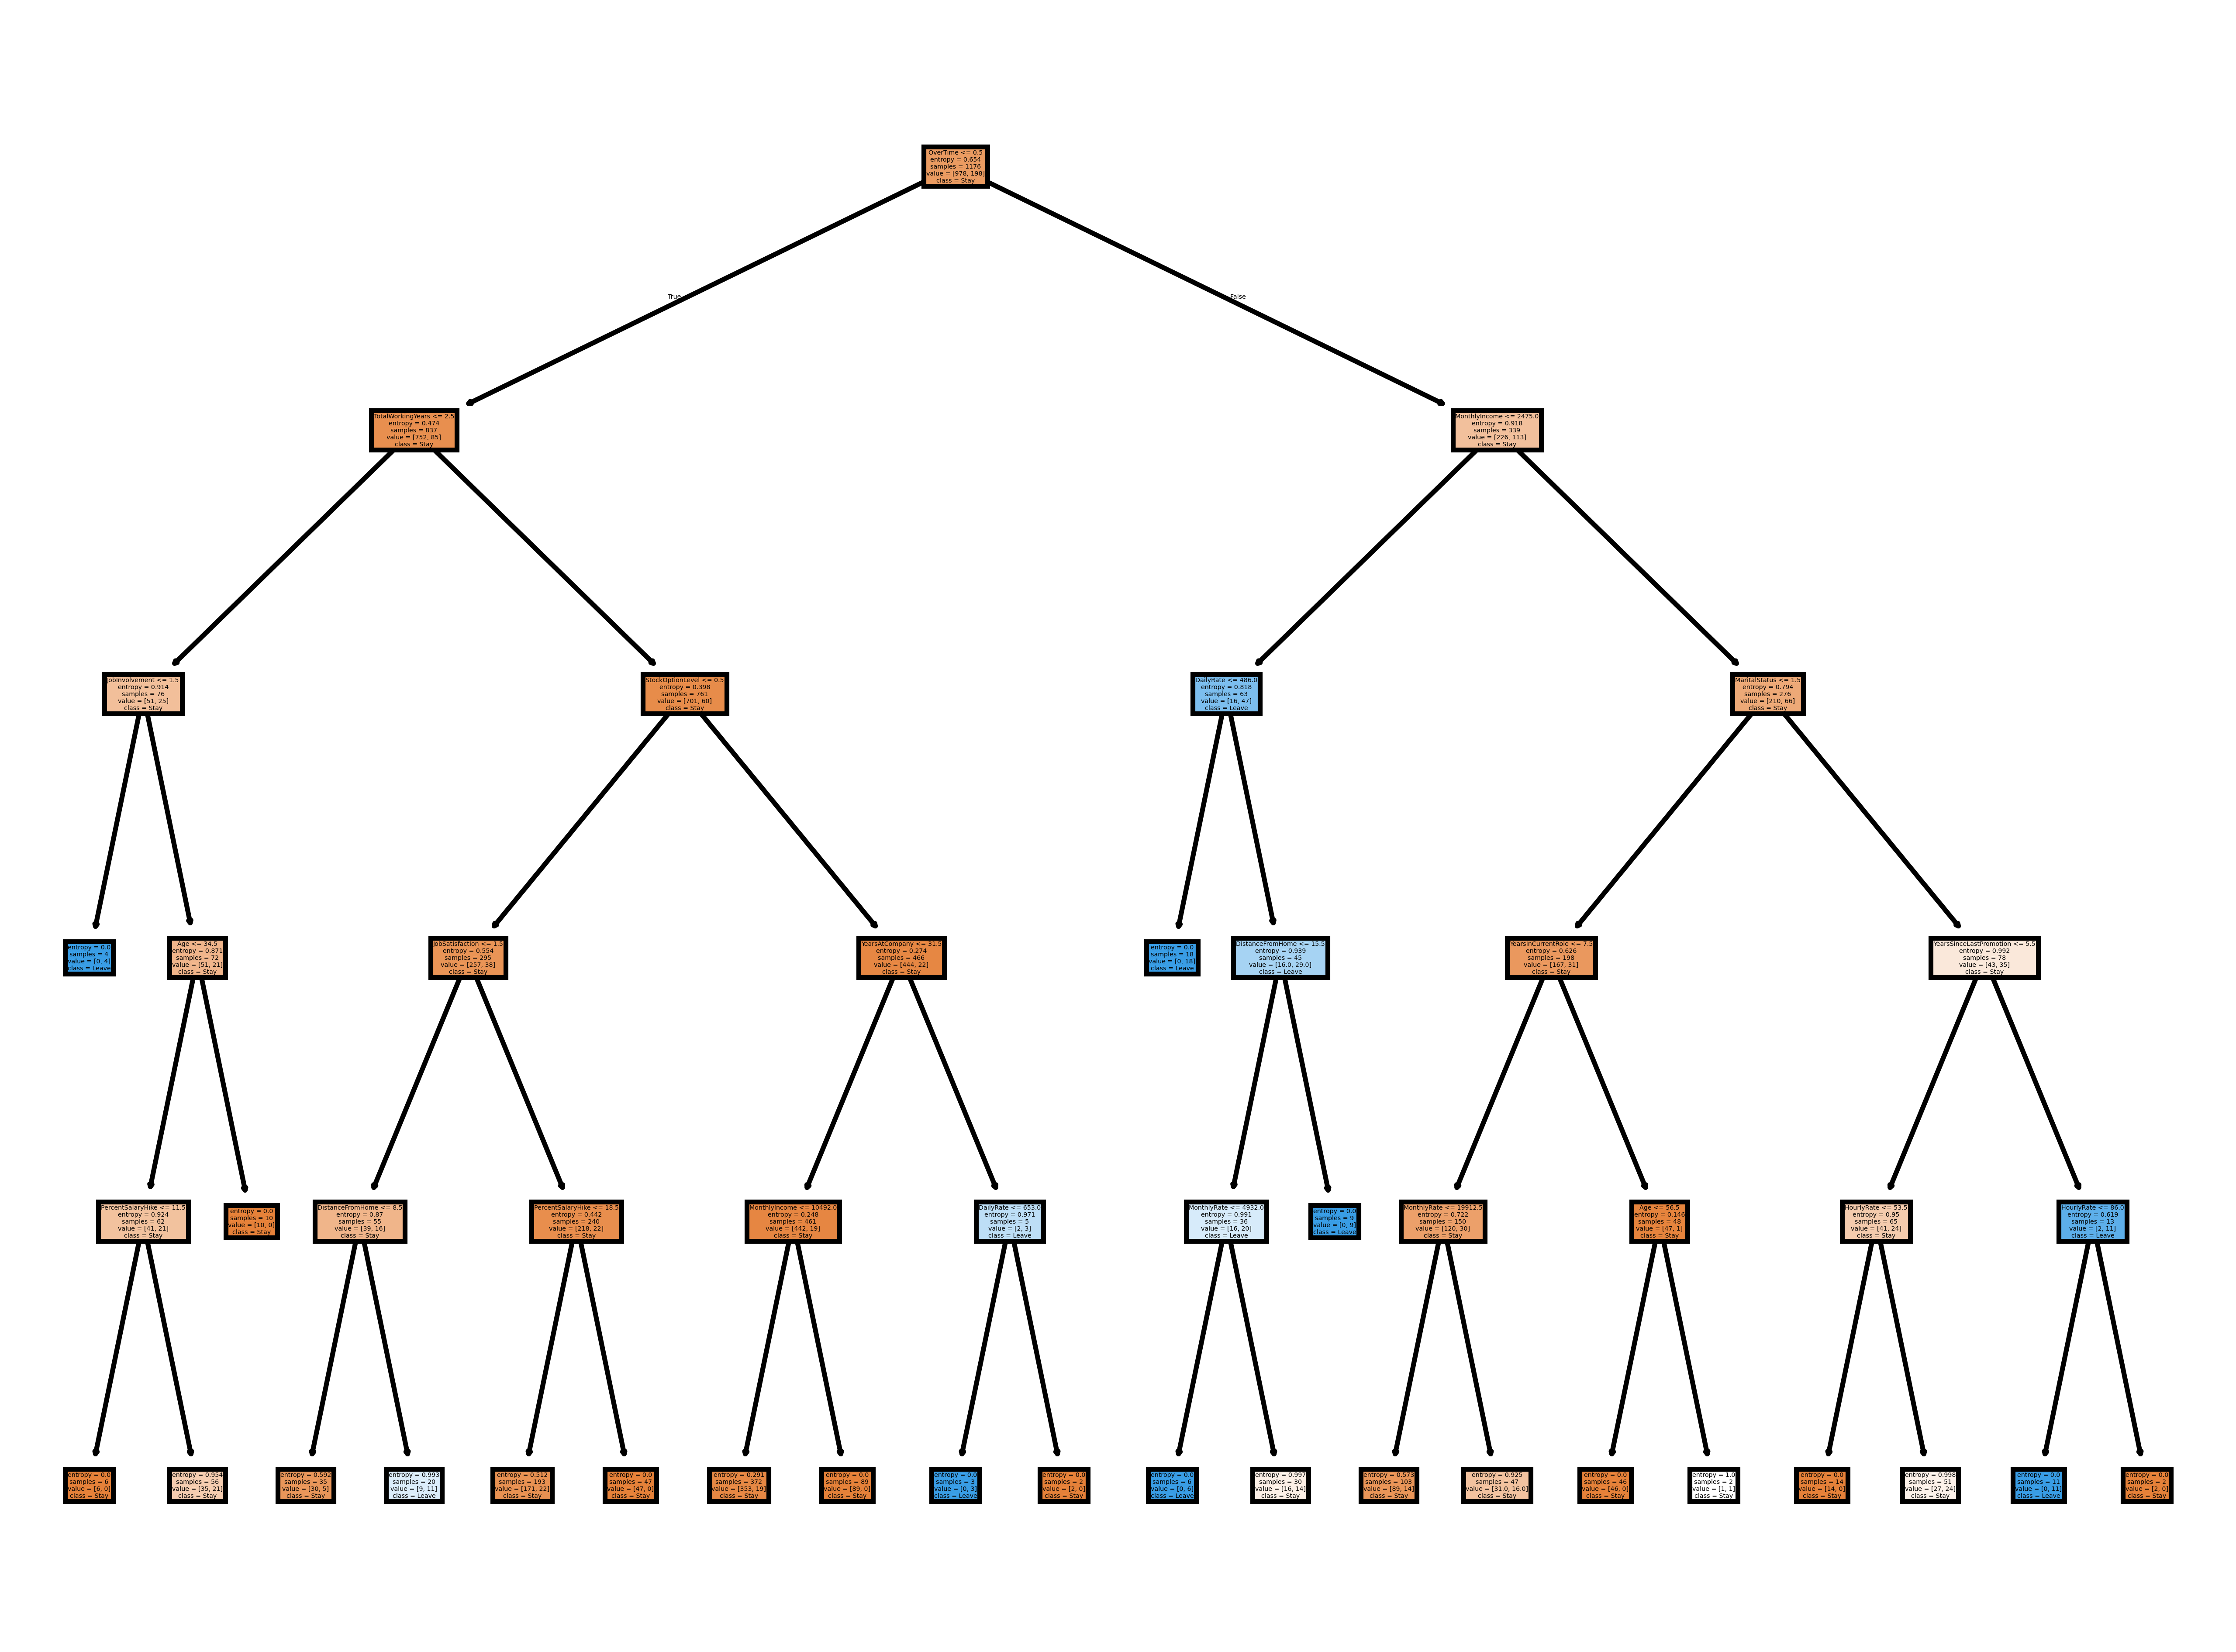

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(8, 6), dpi= 800) 
tree.plot_tree(dt_model, feature_names = X.columns, class_names = ['Stay', 'Leave'], filled=True)
plt.savefig('Diagrams/DecisionTree.png', dpi = 800)
plt.show()

### Step 6: Save the model

In [11]:
import pickle 

# Save the model and feature order
with open('Models/DecisionTree_HR_data.pkl','wb') as file:
    pickle.dump((dt_model, list(X.columns)), file)